In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

np.set_printoptions(linewidth=np.inf, suppress=True, precision=2)

In [5]:
import mitosheet

In [6]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

pyo.init_notebook_mode(connected=True)

In [7]:
with open('Data/Data12/XGB_result_12I1O.pkl', 'rb') as f:
    result = pickle.load(f)

In [8]:
result

[(0,
  'xgbregressor',
  ['Input 08',
   'Input 01',
   'Input 09',
   'Input 06',
   'Input 07',
   'Input 03',
   'Input 10',
   'Input 04',
   'Input 11',
   'Input 02',
   'Input 05',
   'Input 12'],
  {'r2': 0.8975120373748599,
   'neg_root_mean_squared_error': -0.04034910223716744,
   'total_zeros': 7203}),
 (1,
  'xgbregressor',
  ['Input 08',
   'Input 10',
   'Input 01',
   'Input 06',
   'Input 03',
   'Input 07',
   'Input 02',
   'Input 12',
   'Input 05',
   'Input 09',
   'Input 11',
   'Input 04'],
  {'r2': 0.9170809217828582,
   'neg_root_mean_squared_error': -0.03262435891479705,
   'total_zeros': 3318}),
 (2,
  'xgbregressor',
  ['Input 10',
   'Input 08',
   'Input 06',
   'Input 01',
   'Input 02',
   'Input 09',
   'Input 03',
   'Input 07',
   'Input 12',
   'Input 11',
   'Input 05',
   'Input 04'],
  {'r2': 0.9342649287870263,
   'neg_root_mean_squared_error': -0.03060948226575373,
   'total_zeros': 3991}),
 (3,
  'xgbregressor',
  ['Input 10',
   'Input 06',
  

In [9]:
df_r = pd.DataFrame(result)
df_r

,0,1,2,3
0,0,xgbregressor,"[Input 08, Input 01, Input 09, Input 06, Input 07, Input 03, Input 10, Input 04, Input 11, Input 02, Input 05, Input 12]","{'r2': 0.8975120373748599, 'neg_root_mean_squared_error': -0.04034910223716744, 'total_zeros': 7203}"
1,1,xgbregressor,"[Input 08, Input 10, Input 01, Input 06, Input 03, Input 07, Input 02, Input 12, Input 05, Input 09, Input 11, Input 04]","{'r2': 0.9170809217828582, 'neg_root_mean_squared_error': -0.03262435891479705, 'total_zeros': 3318}"
2,2,xgbregressor,"[Input 10, Input 08, Input 06, Input 01, Input 02, Input 09, Input 03, Input 07, Input 12, Input 11, Input 05, Input 04]","{'r2': 0.9342649287870263, 'neg_root_mean_squared_error': -0.03060948226575373, 'total_zeros': 3991}"
3,3,xgbregressor,"[Input 10, Input 06, Input 08, Input 02, Input 01, Input 03, Input 09, Input 11, Input 04, Input 12, Input 07, Input 05]","{'r2': 0.9481534073957645, 'neg_root_mean_squared_error': -0.027486763029986767, 'total_zeros': 2185}"
4,4,xgbregressor,"[Input 10, Input 06, Input 02, Input 01, Input 09, Input 04, Input 07, Input 08, Input 11, Input 05, Input 12, Input 03]","{'r2': 0.9544955067042137, 'neg_root_mean_squared_error': -0.025514294262693294, 'total_zeros': 2335}"
...,...,...,...,...
6,6,xgbregressor,"[Input 10, Input 06, Input 02, Input 04, Input 01, Input 09, Input 07, Input 05, Input 12, Input 08, Input 03, Input 11]","{'r2': 0.9576091169138354, 'neg_root_mean_squared_error': -0.02486647278363733, 'total_zeros': 2900}"
7,7,xgbregressor,"[Input 10, Input 06, Input 02, Input 04, Input 01, Input 09, Input 07, Input 12, Input 05, Input 08, Input 03, Input 11]","{'r2': 0.9573448378699643, 'neg_root_mean_squared_error': -0.025200544909300265, 'total_zeros': 2829}"
8,8,xgbregressor,"[Input 10, Input 06, Input 02, Input 04, Input 01, Input 09, Input 07, Input 12, Input 08, Input 05, Input 03, Input 11]","{'r2': 0.9590745754537698, 'neg_root_mean_squared_error': -0.024570950179591815, 'total_zeros': 2538}"
9,9,xgbregressor,"[Input 10, Input 06, Input 02, Input 04, Input 01, Input 09, Input 07, Input 12, Input 08, Input 03, Input 11, Input 05]","{'r2': 0.9574069697583172, 'neg_root_mean_squared_error': -0.02510546780288595, 'total_zeros': 2423}"


In [10]:
r2 = df_r[3].apply(pd.Series)
r2

,r2,neg_root_mean_squared_error,total_zeros
0,0.897512,-0.040349,7203.0
1,0.917081,-0.032624,3318.0
2,0.934265,-0.030609,3991.0
3,0.948153,-0.027487,2185.0
4,0.954496,-0.025514,2335.0
...,...,...,...
6,0.957609,-0.024866,2900.0
7,0.957345,-0.025201,2829.0
8,0.959075,-0.024571,2538.0
9,0.957407,-0.025105,2423.0


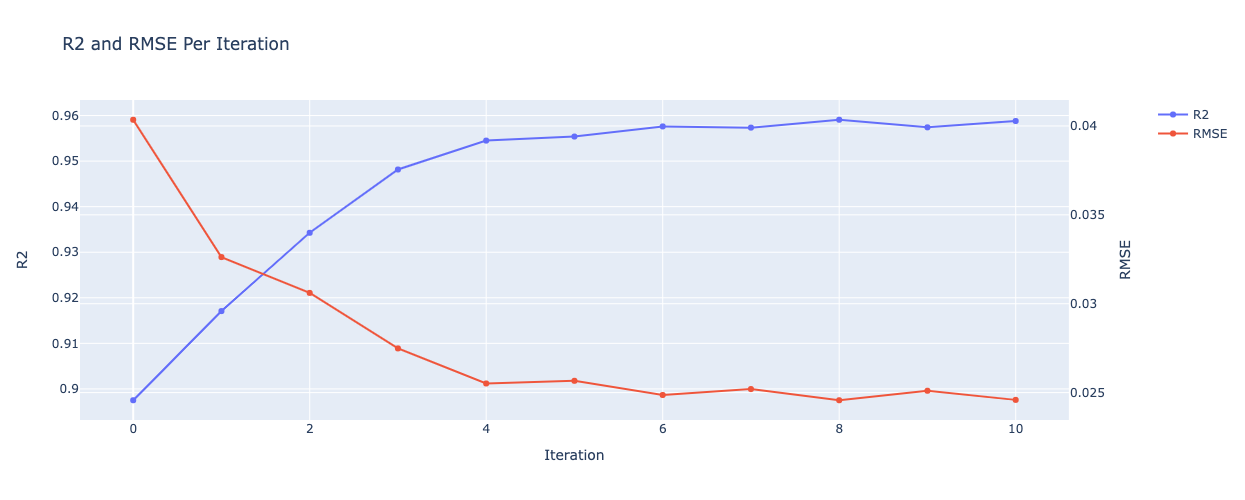

In [11]:
fig = make_subplots(specs=[[{"secondary_y": True}]])


fig.add_trace(go.Scatter(y =  r2.r2, x = r2.index, name = "R2"),  secondary_y=False)
fig.add_trace(go.Scatter(y =  r2.neg_root_mean_squared_error * -1, x = r2.index, name = "RMSE"), secondary_y=True)


fig.update_layout(title="R2 and RMSE Per Iteration",
                    xaxis_title='Iteration',
                    yaxis_title='R2',
                    yaxis2_title='RMSE',
                   autosize=False,
                   width=900,
                  height=500,
                 )
fig.update_layout(title_text = "R2 and RMSE Per Iteration")

fig.show()

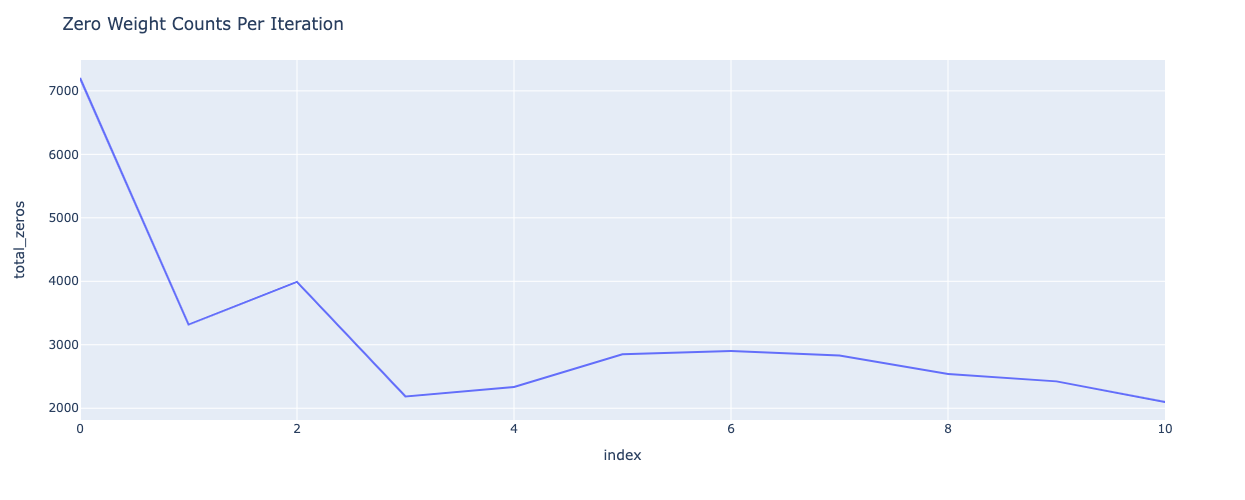

In [12]:
fig = px.line(r2, x=r2.index, y=r2.total_zeros)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Zero Weight Counts Per Iteration",
)

fig.show()

In [13]:
df_imp = pd.read_pickle('Data/Data12/XGB_12I1O_df_imp.pkl')
df_imp

,Feature Name,Importance,index,Zero_Count,Iteration
0,Output 01,0.666940,Output 01,0,0
1,Input 08,0.048775,Input 08,428,0
2,Input 01,0.047104,Input 01,330,0
3,Input 09,0.037908,Input 09,599,0
4,Input 06,0.029872,Input 06,396,0
...,...,...,...,...,...
138,Input 07,0.010661,Input 07,159,10
139,Input 08,0.009881,Input 08,243,10
140,Input 03,0.006488,Input 03,313,10
141,Input 05,0.006474,Input 05,532,10


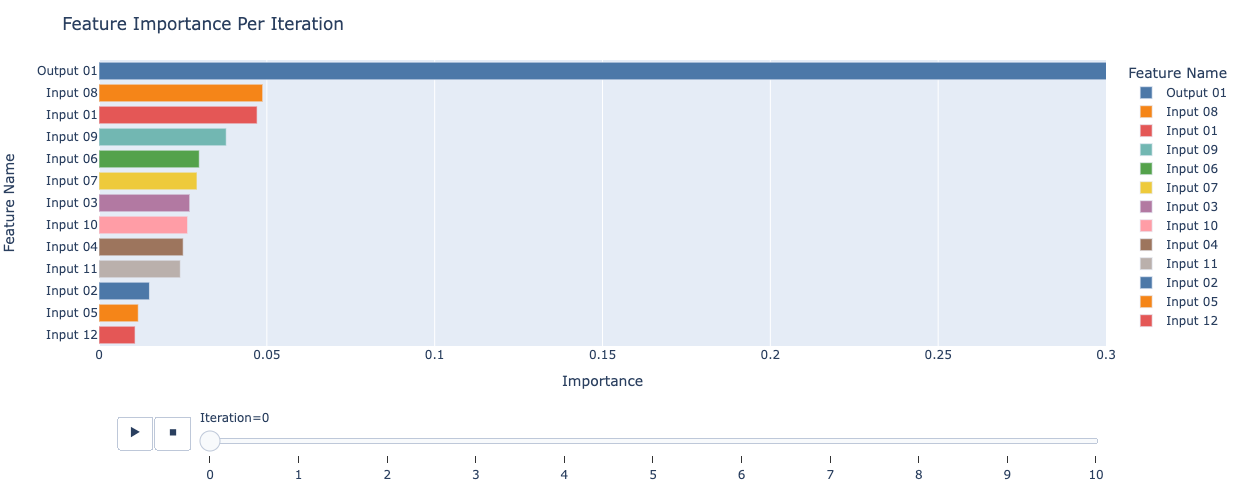

In [14]:
fig = px.bar(
    df_imp,
    y="Feature Name",
    x="Importance",
    color="Feature Name",
    color_discrete_sequence=px.colors.qualitative.T10,
    animation_frame="Iteration",
    animation_group="Feature Name",
    orientation="h",
    range_x=[0,0.3]
)

fig.update_yaxes(categoryorder='total ascending')

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Feature Importance Per Iteration",
    #paper_bgcolor='#2d3035',
    #plot_bgcolor='#2d3035', 
)


fig.show()

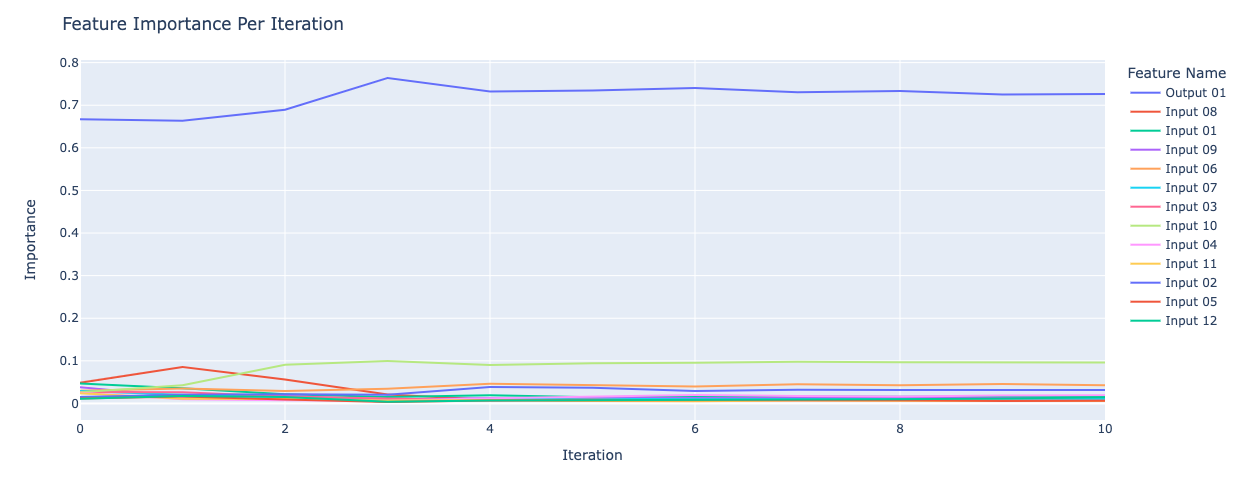

In [15]:
fig = px.line(df_imp, x='Iteration', y="Importance", color = "Feature Name")

fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title_text=f"Feature Importance Per Iteration",
    #paper_bgcolor='#2d3035',
    #plot_bgcolor='#2d3035', 
)

fig.show()